# Condição cardíaca do Paciente
Autor: Vinicius Fontes

OBJETIVO:  Criar um modelo de classificação que preveja se o paciente esta com uma doença cardíaca ou não (condition).

*   Dataset Original: *https://www.kaggle.com/cherngs/heart-disease-cleveland-uci*

Lista de Atributos:
* condition: condição de doença (0: paciente saudável; 1: Paciente doente)
* age: Idade em anos
* sex: Sexo do paciente
* cp: Dor no peito (0:Angina típico; 1:Angina atípico;2: Sem angina; 3: Assintomático)
* trestbos: Pressão sanguínea em repouso
* chol: Colesterol Sérico em mg/dl
* fbs: açúcar no sangue em jejum > 120 mg/dl (0: não; 1: sim)
* restecg: Resultados eletrocardiográficos em repouso (0: normal 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST> 0,05 mV) 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)
* thalach: Frequência cardíaca máxima alcançada
* exang: Angina induzida por exercício (1: sim; 0: não)
* oldpeak: Depressão de ST induzida por exercício em relação ao repouso
* slope: Inclinação do segmento ST de pico do exercício (0: inclinação para cima 1: reta 2: inclinação para baixo)
* ca: Número de vasos principais (0-3) coloridos por fluorosopia
* thal: (0: normal; 1: defeito corrigido; 2: defeito reversível)





## Importando Bibliotecas

In [ ]:
# Biliotecas de Métodos Necessários
import pandas as pd
import numpy as np
import seaborn as sns

# Bibliotecas de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

## Importando Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/WILSON/Métodos não probabilísticos - Regressão Linear/Datasets/heart_cleveland_upload.csv', )
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Pré processamento

### Verificando os tipos dos atributos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


####Verificando existência de valores nulos

In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Análise da existência de correlações entre os atributos

### Correlação linear - Coeficiente de Pearson

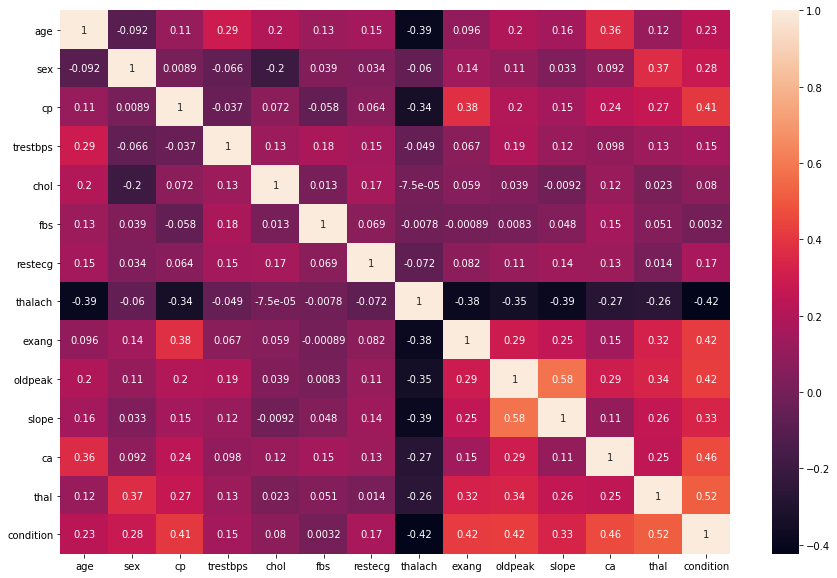

In [ ]:
var_corr = df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

Observando a matriz de correlação, conseugimos enxergar que há correlação negativa significativa entre o atributo 'condition' e 'thalach'. Já entre 'condition' e atributos 'cp','exang', 'oldpeak', 'ca' e 'thal' há correlação positiva considerável.

### Gráficos de dispersão

À fim de visualizar graficamente estas relações, abaixo segue um conjunto de gráfico de disperções entre 'condition' e atibutos que há correlações consideráveis.

Gráfico de dispersão entre Condição do Paciente x Frequência cardíaca máxima alcançada

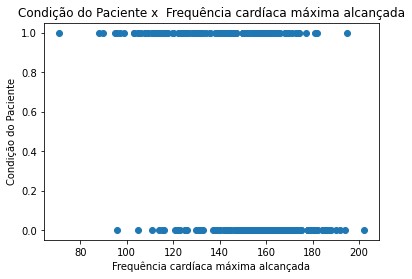

In [ ]:
plt.scatter(df.thalach,df.condition)
plt.xlabel('Frequência cardíaca máxima alcançada')
plt.ylabel('Condição do Paciente')
plt.title('Condição do Paciente x  Frequência cardíaca máxima alcançada')
plt.show()

Gráfico de dispersão entre Condição do Paciente x Dor no peito

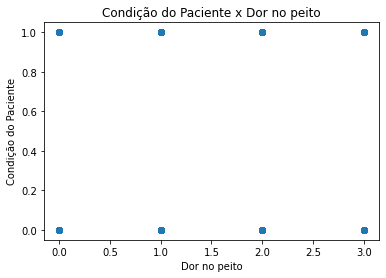

In [ ]:
plt.scatter(df.cp,df.condition)
plt.xlabel('Dor no peito')
plt.ylabel('Condição do Paciente')
plt.title('Condição do Paciente x Dor no peito')
plt.show()

Gráfico de dispersão entre Condição do Paciente x Angina induzida por exercício

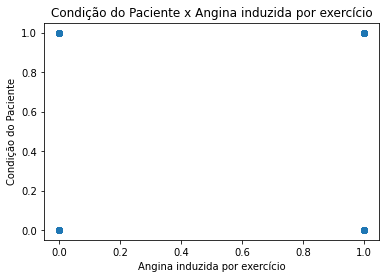

In [ ]:
plt.scatter(df.exang,df.condition)
plt.xlabel('Angina induzida por exercício')
plt.ylabel('Condição do Paciente')
plt.title('Condição do Paciente x Angina induzida por exercício')
plt.show()

Gráfico de dispersão entre Condição do Paciente x Depressão de ST induzida por exercício em relação ao repouso

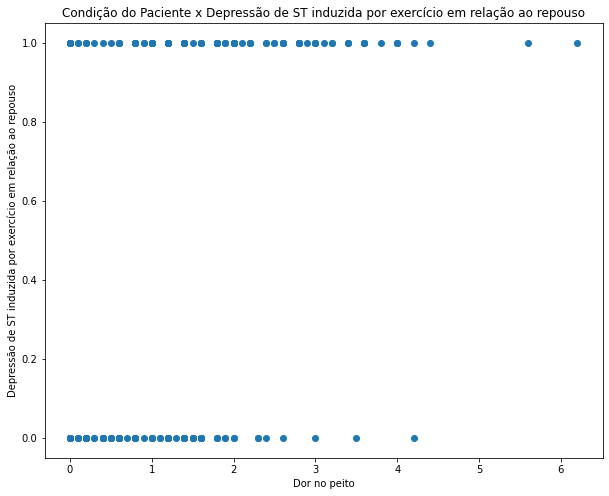

In [ ]:
plt.subplots(figsize=(10, 8))
plt.scatter(df.oldpeak,df.condition)
plt.xlabel('Dor no peito')
plt.ylabel('Depressão de ST induzida por exercício em relação ao repouso')
plt.title('Condição do Paciente x Depressão de ST induzida por exercício em relação ao repouso')
plt.show()

Gráfico de dispersão entre Condição do Paciente x Número de vasos principais coloridos por fluorosopia

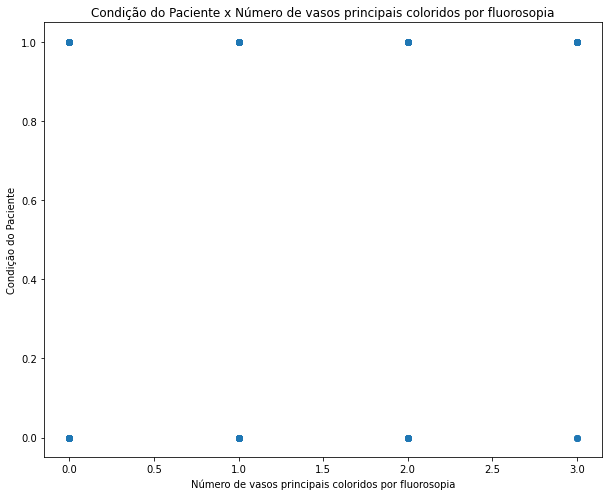

In [ ]:
plt.subplots(figsize=(10, 8))
plt.scatter(df.ca,df.condition)
plt.xlabel('Número de vasos principais coloridos por fluorosopia')
plt.ylabel('Condição do Paciente')
plt.title('Condição do Paciente x Número de vasos principais coloridos por fluorosopia')
plt.show()

thal: (0: normal; 1: defeito corrigido; 2: defeito reversível)

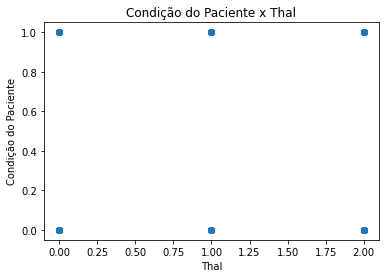

In [ ]:
plt.scatter(df.thal,df.condition)
plt.xlabel('Thal')
plt.ylabel('Condição do Paciente')
plt.title('Condição do Paciente x Thal')
plt.show()

## Manipulação das Variáveis dos Modelos

### Selecionando variáveis para o treinamento dos Modelos

In [ ]:
X1 = df[['thalach','cp','exang','oldpeak','ca','thal']]
X2 = df[['oldpeak','ca','thal']]
X3 = df[['thalach','cp','exang']]
X4 = df[['cp','oldpeak','thal']]
y = df.condition

In [ ]:
print('Dimensões de X1',X1.shape)
print('Dimensões de X2',X2.shape)
print('Dimensões de X3',X3.shape)
print('Dimensões de X4',X4.shape)
print('Dimensões de y',y.shape)

Dimensões de X1 (297, 6)
Dimensões de X2 (297, 3)
Dimensões de X3 (297, 3)
Dimensões de X4 (297, 3)
Dimensões de y (297,)


### Normalização dos valores de X de entrada

In [ ]:
escalonador = StandardScaler()
escalonador.fit(X1)      
X1_Norm = escalonador.transform(X1)

escalonador = StandardScaler()
escalonador.fit(X2)
X2_Norm = escalonador.transform(X2)

escalonador = StandardScaler()
escalonador.fit(X3)
X3_Norm = escalonador.transform(X3)

escalonador = StandardScaler()
escalonador.fit(X4)
X4_Norm = escalonador.transform(X4)

### Separando dados em treino e teste

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_Norm, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_Norm, y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_Norm, y)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4_Norm, y)

## Regressão Logística Múltipla

### Treinando Modelos de Regressão Linear Múltipla

In [ ]:
reglog1 = LogisticRegression()
reglog1.fit(X_train1,y_train1)

reglog2 = LogisticRegression()
reglog2.fit(X_train2,y_train2)

reglog3 = LogisticRegression()
reglog3.fit(X_train3,y_train3)

reglog4 = LogisticRegression()
reglog4.fit(X_train4,y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Previsões dos Modelos de Regressão Linear Múltipla

In [ ]:
y_pred1 = reglog1.predict(X_test1)
y_pred2 = reglog2.predict(X_test2)
y_pred3 = reglog3.predict(X_test3)
y_pred4 = reglog4.predict(X_test4)

### Métricas de Qualidade dos Modelos

In [ ]:
print("Matriz de confusão do Modelo 1:\n",confusion_matrix(y_test1,y_pred1))
print(classification_report(y_true = y_test1,y_pred = y_pred1,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 2:\n",confusion_matrix(y_test2,y_pred2))
print(classification_report(y_true = y_test2,y_pred = y_pred2,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 3:\n",confusion_matrix(y_test3,y_pred3))
print(classification_report(y_true = y_test3,y_pred = y_pred3,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 4:\n",confusion_matrix(y_test4,y_pred4))
print(classification_report(y_true = y_test4,y_pred = y_pred4,digits = 4))

Matriz de confusão do Modelo 1:
 [[25  5]
 [10 35]]
              precision    recall  f1-score   support

           0     0.7143    0.8333    0.7692        30
           1     0.8750    0.7778    0.8235        45

    accuracy                         0.8000        75
   macro avg     0.7946    0.8056    0.7964        75
weighted avg     0.8107    0.8000    0.8018        75



Matriz de confusão do Modelo 2:
 [[30 12]
 [ 8 25]]
              precision    recall  f1-score   support

           0     0.7895    0.7143    0.7500        42
           1     0.6757    0.7576    0.7143        33

    accuracy                         0.7333        75
   macro avg     0.7326    0.7359    0.7321        75
weighted avg     0.7394    0.7333    0.7343        75



Matriz de confusão do Modelo 3:
 [[33 10]
 [12 20]]
              precision    recall  f1-score   support

           0     0.7333    0.7674    0.7500        43
           1     0.6667    0.6250    0.6452        32

    accuracy          

### Validação Cruzada - K-fold

In [ ]:
valCru1 = cross_val_score(reglog1,X_test1,y_test1, cv =10, scoring='neg_root_mean_squared_error')
m1=np.mean(-valCru1)
dp1=np.std(-valCru1,ddof=1)

valCru2 = cross_val_score(reglog2,X_test2,y_test2, cv =10, scoring='neg_root_mean_squared_error')
m2=np.mean(-valCru2)
dp2=np.std(-valCru2,ddof=1)

valCru3 = cross_val_score(reglog3,X_test3,y_test3, cv =10, scoring='neg_root_mean_squared_error')
m3=np.mean(-valCru3)
dp3=np.std(-valCru3,ddof=1)

valCru4 = cross_val_score(reglog4,X_test4,y_test4, cv =10, scoring='neg_root_mean_squared_error')
m4=np.mean(-valCru4)
dp4=np.std(-valCru4,ddof=1)

print('\nRMSE médio do Modelo 1: %.4f'%m1)
print('Desvio Padrão entre os RMSE do Modelo 1: %.4f'%dp1)
print('Variação Percentual do RMSE do Modelo 1: %.4f'%(100*dp1/m1))

print('\nRMSE médio do Modelo 2: %.4f'%m2)
print('Desvio Padrão entre os RMSE do Modelo 2: %.4f'%dp2)
print('Variação Percentual do RMSE do Modelo 2: %.4f'%(100*dp2/m2))

print('\nRMSE médio do Modelo 3: %.4f'%m3)
print('Desvio Padrão entre os RMSE do Modelo 3: %.4f'%dp3)
print('Variação Percentual do RMSE do Modelo 3: %.4f'%(100*dp3/m3))

print('\nRMSE médio do Modelo 4: %.4f'%m4)
print('Desvio Padrão entre os RMSE do Modelo 4: %.4f'%dp4)
print('Variação Percentual do RMSE do Modelo 4: %.4f'%(100*dp3/m4))


RMSE médio do Modelo 1: 0.4020
Desvio Padrão entre os RMSE do Modelo 1: 0.1696
Variação Percentual do RMSE do Modelo 1: 42.1908

RMSE médio do Modelo 2: 0.5032
Desvio Padrão entre os RMSE do Modelo 2: 0.1277
Variação Percentual do RMSE do Modelo 2: 25.3878

RMSE médio do Modelo 3: 0.5301
Desvio Padrão entre os RMSE do Modelo 3: 0.1055
Variação Percentual do RMSE do Modelo 3: 19.8997

RMSE médio do Modelo 4: 0.3709
Desvio Padrão entre os RMSE do Modelo 4: 0.2355
Variação Percentual do RMSE do Modelo 4: 28.4413


### Escolha do melhor modelo de Regressão Logística Múltipla

Após interpretação dos modelos de Regressão Logística Mútipla gerados, é possível dizer através das métricas de Acurácia, Recall e RMSE que o MODELO 1 é o melhor:
* Acurácia do do Modelo 1: 80,00%
* Recall para VP do Modelo 1: 0.7778
* RMSE médio do Modelo 1: 0,4020

*Utilizado o Recall VP (Verdade Positivo), pois neste caso é melhor considerar que um paciente possa ser considerado doente porém estar saudável do que estar doente e considerá-lo saúdavel.*

### Curva ROC do Modelo 1 de Regressao Logística Múltipla

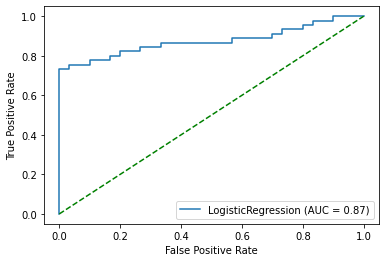

In [ ]:
plot_roc_curve(reglog1,X_test1,y_test1)
plt.plot([0,1],[0,1],'k--',color = 'green')
plt.show()

## KNN

Neste modelo utilizarei os mesmos atributos dos Modelos de Regressão Linear Múltipla para criação dos Modelos KNN

### Treinando Modelos de KNN

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors =5)
knn1.fit(X_train1,y_train1)

knn2 = KNeighborsClassifier(n_neighbors =5)
knn2.fit(X_train2,y_train2)

knn3 = KNeighborsClassifier(n_neighbors =5)
knn3.fit(X_train3,y_train3)

knn4 = KNeighborsClassifier(n_neighbors =5)
knn4.fit(X_train4,y_train4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Previsões dos Modelos de Regressão Linear Múltipla

In [ ]:
y_pred1 = knn1.predict(X_test1)
y_pred2 = knn2.predict(X_test2)
y_pred3 = knn3.predict(X_test3)
y_pred4 = knn4.predict(X_test4)

### Métricas de Qualidade dos Modelos

In [ ]:
print("Matriz de confusão do Modelo 1:\n",confusion_matrix(y_test1,y_pred1))
print(classification_report(y_true = y_test1,y_pred = y_pred1,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 2:\n",confusion_matrix(y_test2,y_pred2))
print(classification_report(y_true = y_test2,y_pred = y_pred2,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 3:\n",confusion_matrix(y_test3,y_pred3))
print(classification_report(y_true = y_test3,y_pred = y_pred3,digits = 4))
print('\n')
print("Matriz de confusão do Modelo 4:\n",confusion_matrix(y_test4,y_pred4))
print(classification_report(y_true = y_test4,y_pred = y_pred4,digits = 4))

Matriz de confusão do Modelo 1:
 [[27  3]
 [12 33]]
              precision    recall  f1-score   support

           0     0.6923    0.9000    0.7826        30
           1     0.9167    0.7333    0.8148        45

    accuracy                         0.8000        75
   macro avg     0.8045    0.8167    0.7987        75
weighted avg     0.8269    0.8000    0.8019        75



Matriz de confusão do Modelo 2:
 [[35  7]
 [11 22]]
              precision    recall  f1-score   support

           0     0.7609    0.8333    0.7955        42
           1     0.7586    0.6667    0.7097        33

    accuracy                         0.7600        75
   macro avg     0.7597    0.7500    0.7526        75
weighted avg     0.7599    0.7600    0.7577        75



Matriz de confusão do Modelo 3:
 [[36  7]
 [12 20]]
              precision    recall  f1-score   support

           0     0.7500    0.8372    0.7912        43
           1     0.7407    0.6250    0.6780        32

    accuracy          

### Validação Cruzada - K-fold

In [ ]:
valCru1 = cross_val_score(knn1,X_test1,y_test1, cv =10, scoring='neg_root_mean_squared_error')
m1=np.mean(-valCru1)
dp1=np.std(-valCru1,ddof=1)

valCru2 = cross_val_score(knn2,X_test2,y_test2, cv =10, scoring='neg_root_mean_squared_error')
m2=np.mean(-valCru2)
dp2=np.std(-valCru2,ddof=1)

valCru3 = cross_val_score(knn3,X_test3,y_test3, cv =10, scoring='neg_root_mean_squared_error')
m3=np.mean(-valCru3)
dp3=np.std(-valCru3,ddof=1)

valCru4 = cross_val_score(knn4,X_test4,y_test4, cv =10, scoring='neg_root_mean_squared_error')
m4=np.mean(-valCru4)
dp4=np.std(-valCru4,ddof=1)

print('\nRMSE médio do Modelo 1: %.4f'%m1)
print('Desvio Padrão entre os RMSE do Modelo 1: %.4f'%dp1)
print('Variação Percentual do RMSE do Modelo 1: %.4f'%(100*dp1/m1))

print('\nRMSE médio do Modelo 2: %.4f'%m2)
print('Desvio Padrão entre os RMSE do Modelo 2: %.4f'%dp2)
print('Variação Percentual do RMSE do Modelo 2: %.4f'%(100*dp2/m2))

print('\nRMSE médio do Modelo 3: %.4f'%m3)
print('Desvio Padrão entre os RMSE do Modelo 3: %.4f'%dp3)
print('Variação Percentual do RMSE do Modelo 3: %.4f'%(100*dp3/m3))
  
print('\nRMSE médio do Modelo 4: %.4f'%m4)
print('Desvio Padrão entre os RMSE do Modelo 4: %.4f'%dp4)
print('Variação Percentual do RMSE do Modelo 4: %.4f'%(100*dp3/m4))


RMSE médio do Modelo 1: 0.4081
Desvio Padrão entre os RMSE do Modelo 1: 0.1929
Variação Percentual do RMSE do Modelo 1: 47.2622

RMSE médio do Modelo 2: 0.4789
Desvio Padrão entre os RMSE do Modelo 2: 0.1051
Variação Percentual do RMSE do Modelo 2: 21.9456

RMSE médio do Modelo 3: 0.4862
Desvio Padrão entre os RMSE do Modelo 3: 0.2072
Variação Percentual do RMSE do Modelo 3: 42.6207

RMSE médio do Modelo 4: 0.4169
Desvio Padrão entre os RMSE do Modelo 4: 0.2026
Variação Percentual do RMSE do Modelo 4: 49.7057


### Escolha do melhor modelo de KNN

Após interpretação dos modelos KNN gerados, é possível dizer através das métricas de Acurácia, Recall e RMSE que o MODELO 1 é o melhor:
* Acurácia do do Modelo 1: 80,00%
* Recall para VP do Modelo 1: 0,7333
* RMSE médio do Modelo 1: 0,4081

*Utilizado o Recall VP (Verdade Positivo), pois neste caso é melhor considerar que um paciente possa ser considerado doente porém estar saudável do que estar doente e considerá-lo saúdavel.*

### Curva ROC do melhor modelo de KNN

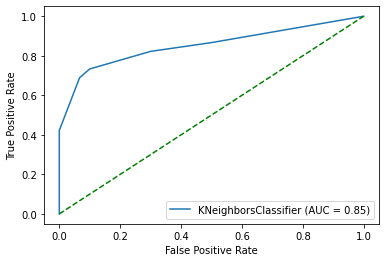

In [ ]:
plot_roc_curve(knn1,X_test1,y_test1)
plt.plot([0,1],[0,1],'k--',color = 'green')
plt.show()

## Conclusão

Neste estudo foi levado em consideração dois algoritmos de classificação, Regressão Logística Múltipla e KNN. 

Após análise sobre a existência de Correlação Linear entre as variáveis independentes e dependente do estudo, elaborei 4 modelos distintos para cada um dos algoritmos à fim de encontrar qual deles teria maior poder de generalização sobre dados não conhecidos no sistema. 

Levando em consideração as métricas de Acurácia, Recall, RMSE e AUC obtivemos os seguintes valores:

===> Regressão Logística Múltipla - Modelo 1:
* Acurácia do do Modelo 1: 80,00%
* Recall para VP do Modelo 1: 0.7778
* RMSE médio do Modelo 1: 0,4020
* AUC: 0,87

===> KNN - Modelo 1:
* Acurácia do do Modelo 1: 80,00%
* Recall para VP do Modelo 1: 0,7333
* RMSE médio do Modelo 1: 0,4081
* AUC: 0,85

Assim, chegamos a conclusão que ambos os modelos tem uma acurácia de 80% para generalização de valores desconhecidos , no entando quando comparamos  a capacidade de classificar valores positivos realmente como positivos (Recall), o Modelo 1 do Regressão Logística Múltipla leva uma pequena vantagem. Em relação as outras métricas, a Regressão Logística Múltipla também leva uma pequena vantagem sobre o KNN.

**Portanto para este estudo o Modelo 1 de Regressão Logística Múltipla é a melhor escolha e os principais atributos que ajudam nesta generalização são:**

* **thalach: Frequência cardíaca máxima alcançada**
* **exang: Angina induzida por exercício**
* **oldpeak: Depressão de ST induzida por exercício em relação ao repouso**
* **ca: Número de vasos principais coloridos por fluorosopia**
* **thal: (0: normal; 1: defeito corrigido; 2: defeito reversível)**
* **cp: Dor no peito***

